In [1]:
import pandas as pd

# 从URL导入数据
url = "https://storage.googleapis.com/dft-statistics/road-traffic/downloads/rawcount/region_id/dft_rawcount_region_id_3.csv"
data = pd.read_csv(url)

# 查看前几行数据以确保成功加载
print(data.head())

print(data.shape)

   count_point_id direction_of_travel  year  count_date  hour  region_id  \
0              62                   E  2021  2021-09-15     7          3   
1              62                   E  2021  2021-09-15     8          3   
2              62                   E  2021  2021-09-15     9          3   
3              62                   E  2021  2021-09-15    10          3   
4              62                   E  2021  2021-09-15    11          3   

  region_name  local_authority_id local_authority_name road_name  ...  \
0    Scotland                   4    North Lanarkshire       M80  ...   
1    Scotland                   4    North Lanarkshire       M80  ...   
2    Scotland                   4    North Lanarkshire       M80  ...   
3    Scotland                   4    North Lanarkshire       M80  ...   
4    Scotland                   4    North Lanarkshire       M80  ...   

  buses_and_coaches lgvs hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
0                 1  707               

/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_1929/634429810.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [2]:
# 检查每列中的缺失值数量
missing_values = data.isnull().sum()

# 只显示有缺失值的列
missing_columns = missing_values[missing_values > 0]

print("含有缺失值的列及其缺失值数量：")
print(missing_columns)

# 删除含有缺失值的列
data_cleaned = data.dropna(axis=1)

# 查看新的数据集的行列数
print("删除含有缺失值的列后，数据的形状（行数，列数）：")
print(data_cleaned.shape)



含有缺失值的列及其缺失值数量：
start_junction_road_name    164280
end_junction_road_name      164280
link_length_km              164028
link_length_miles           164028
dtype: int64
删除含有缺失值的列后，数据的形状（行数，列数）：
(306096, 28)


/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_1929/2841733674.py:7: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


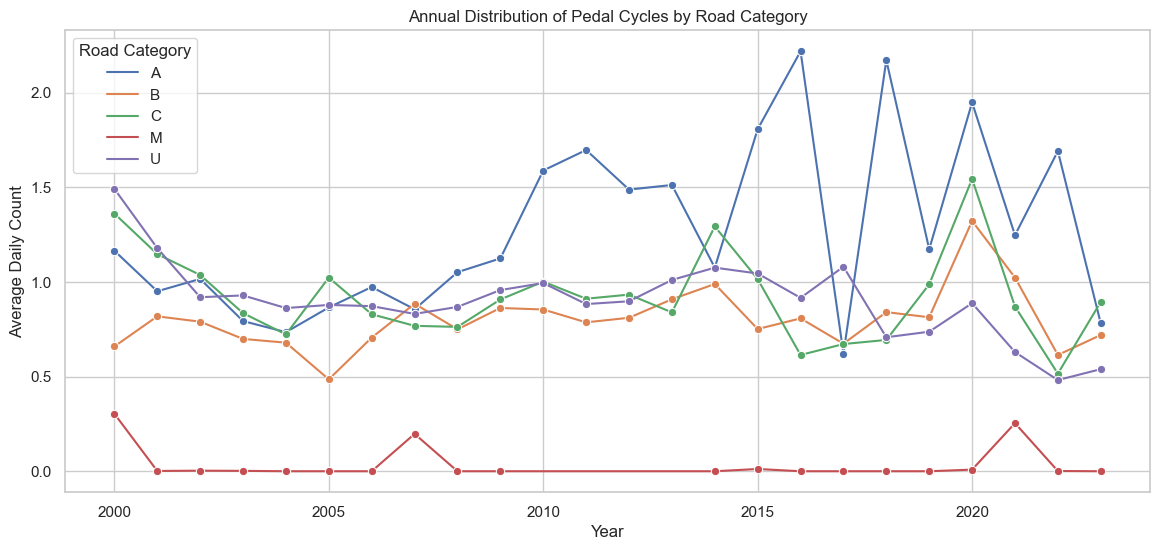

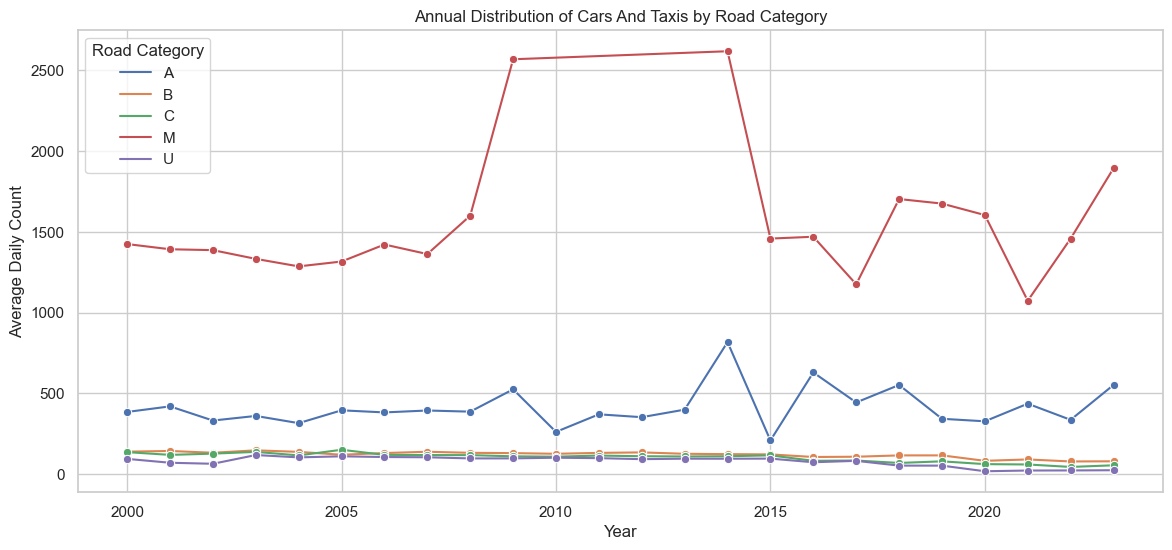

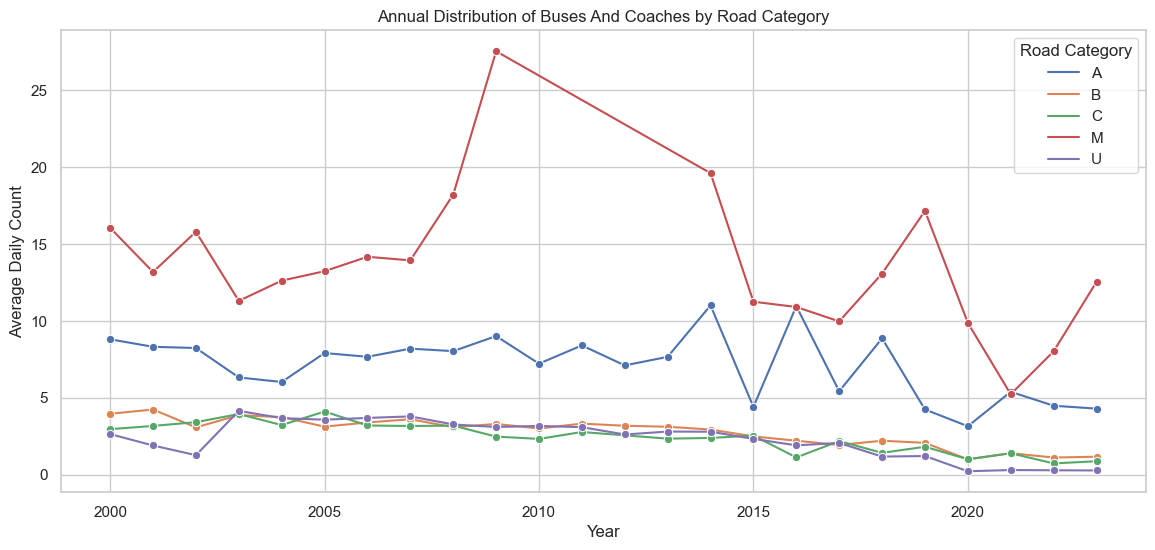

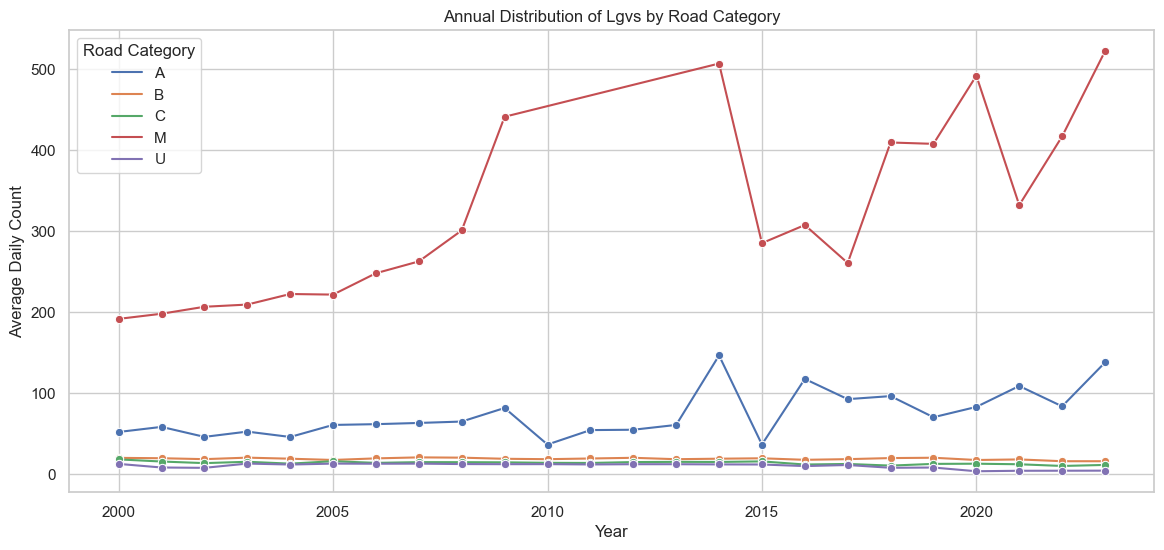

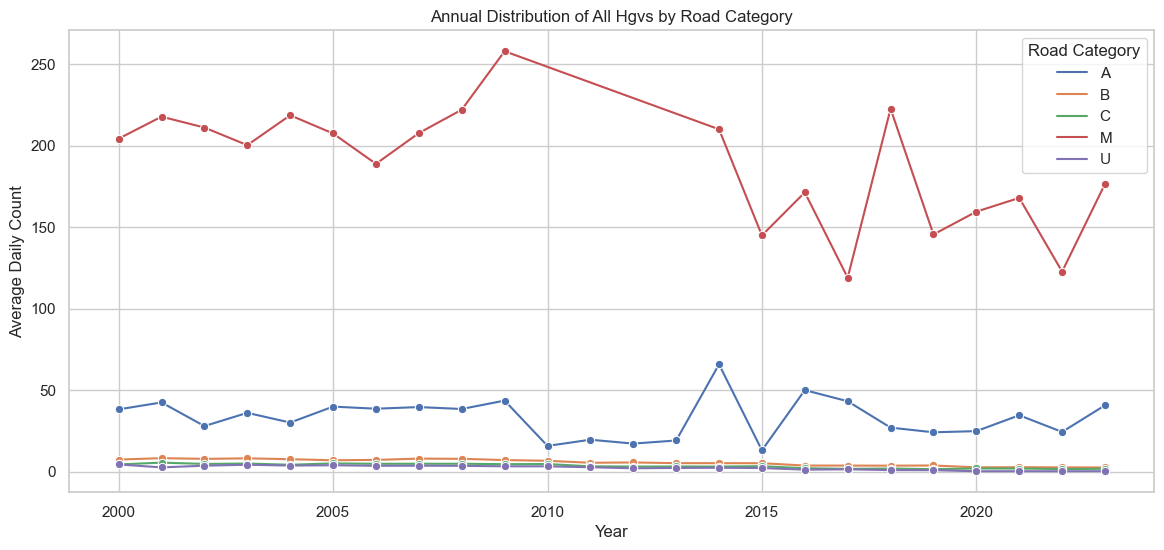

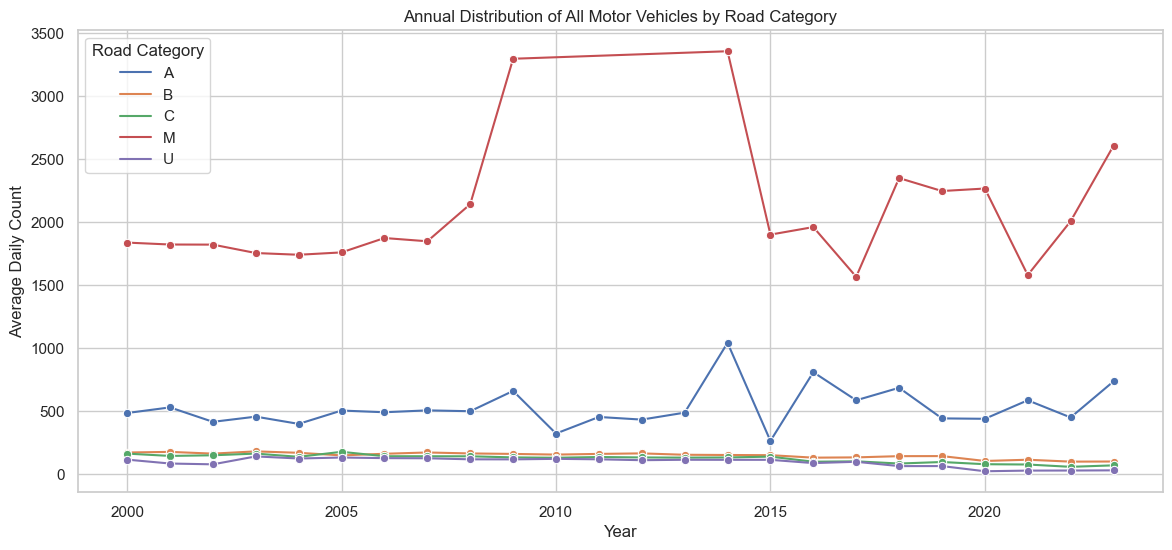

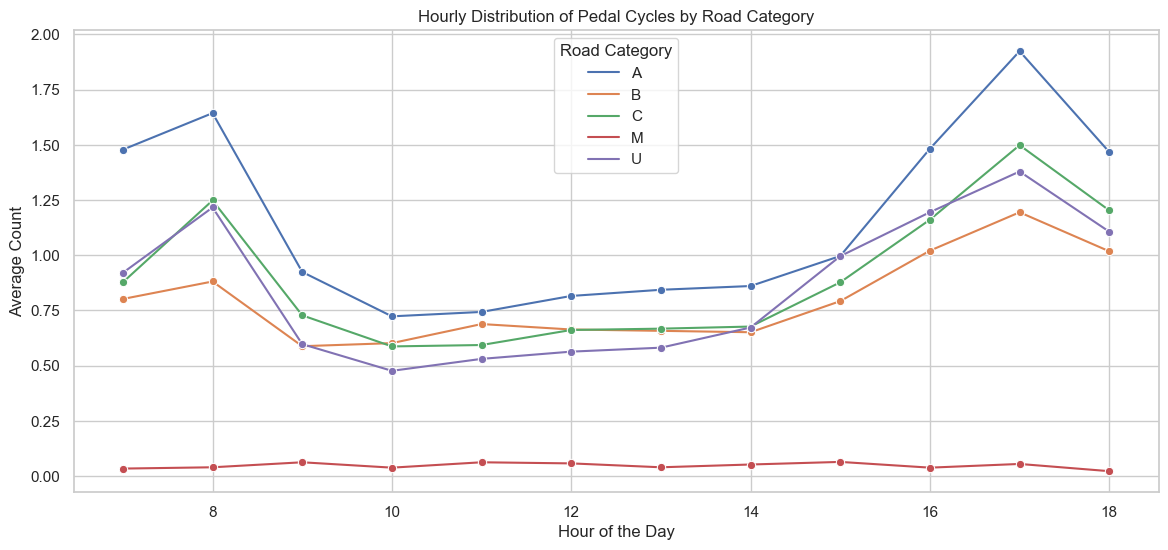

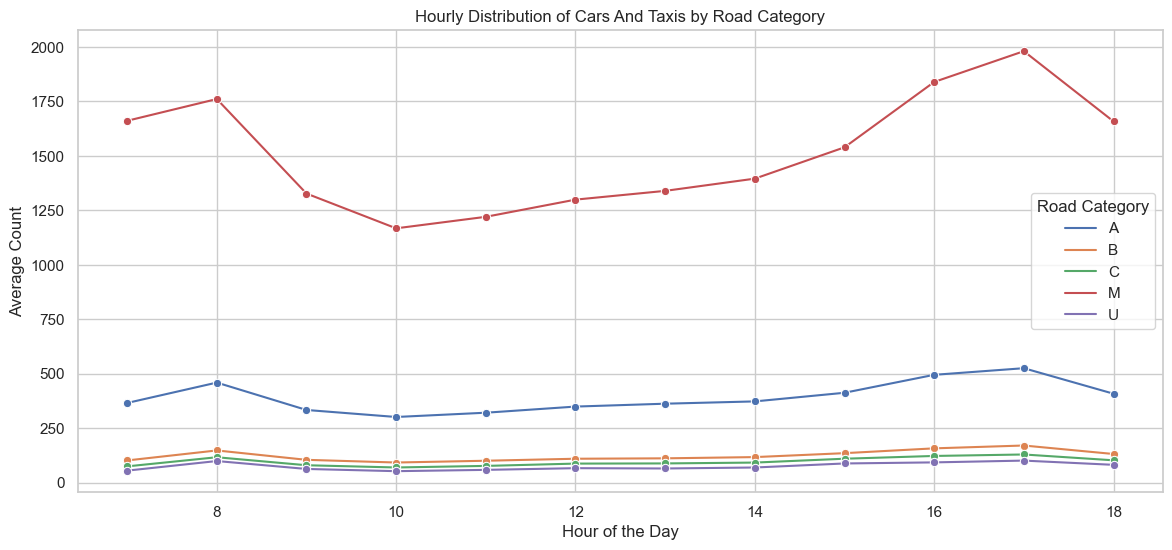

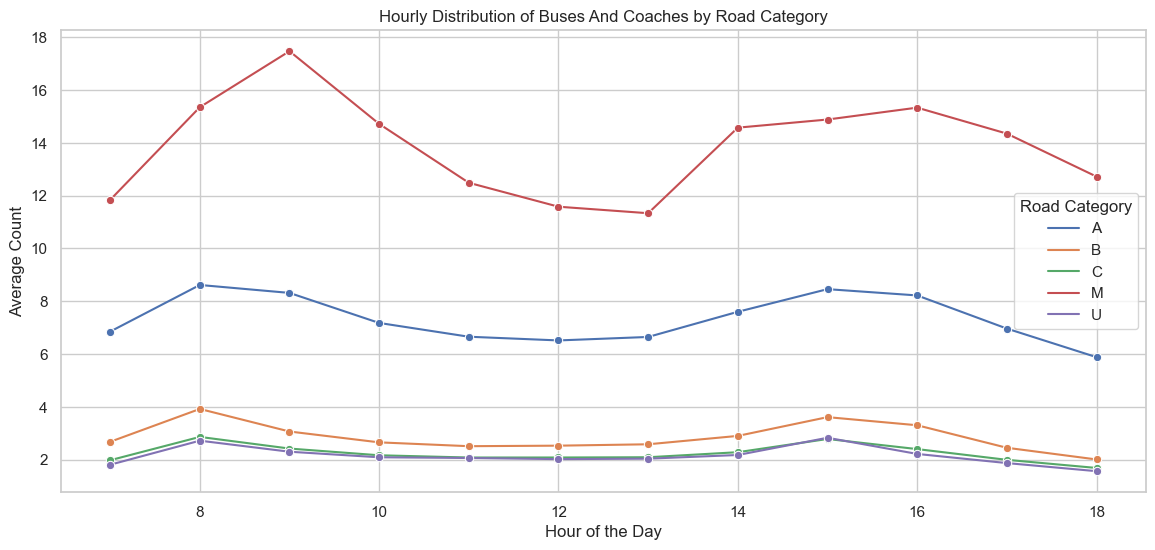

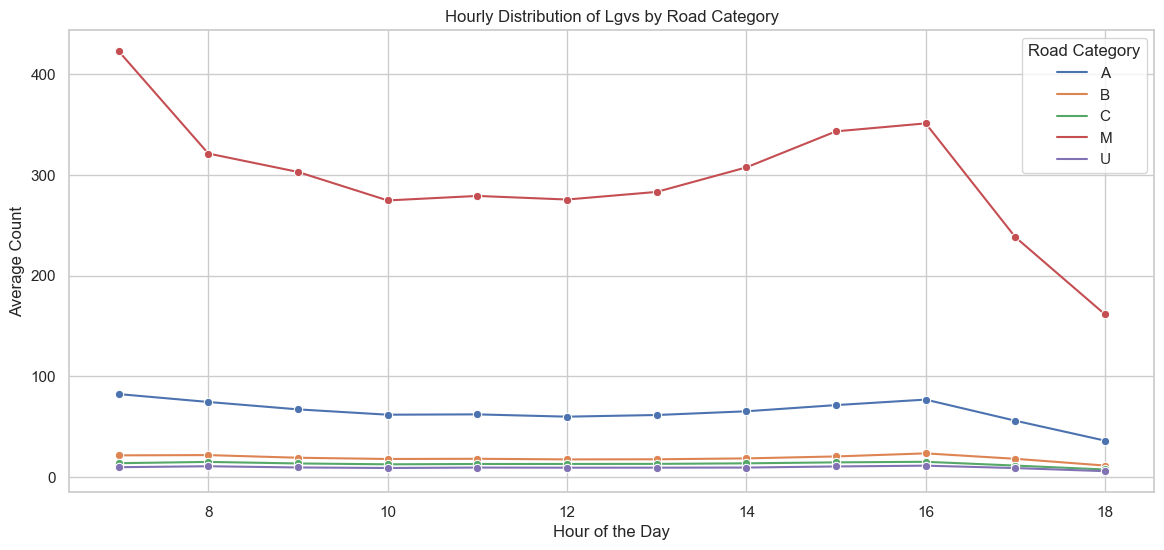

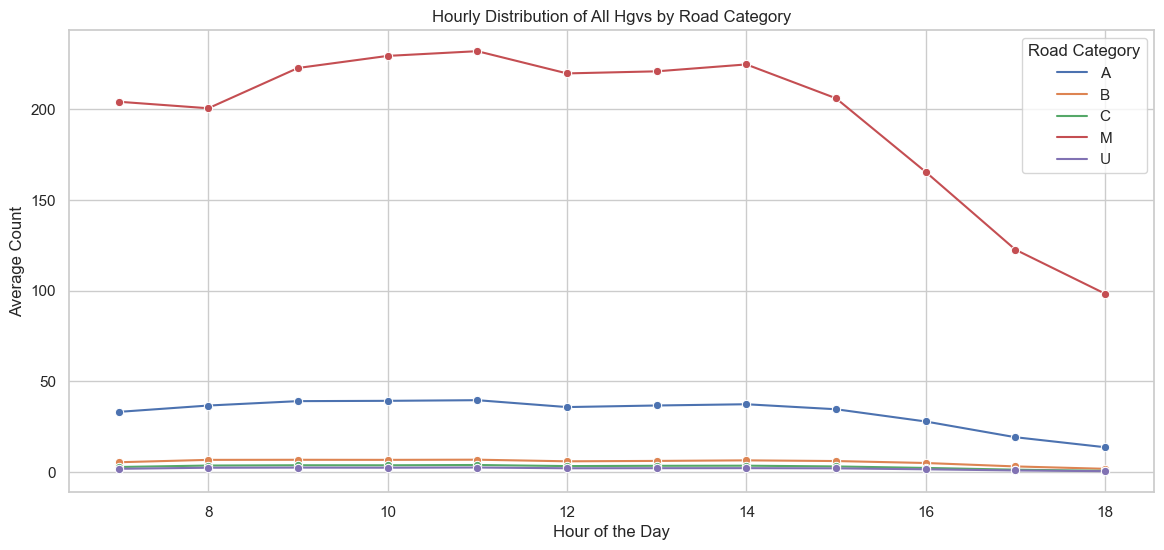

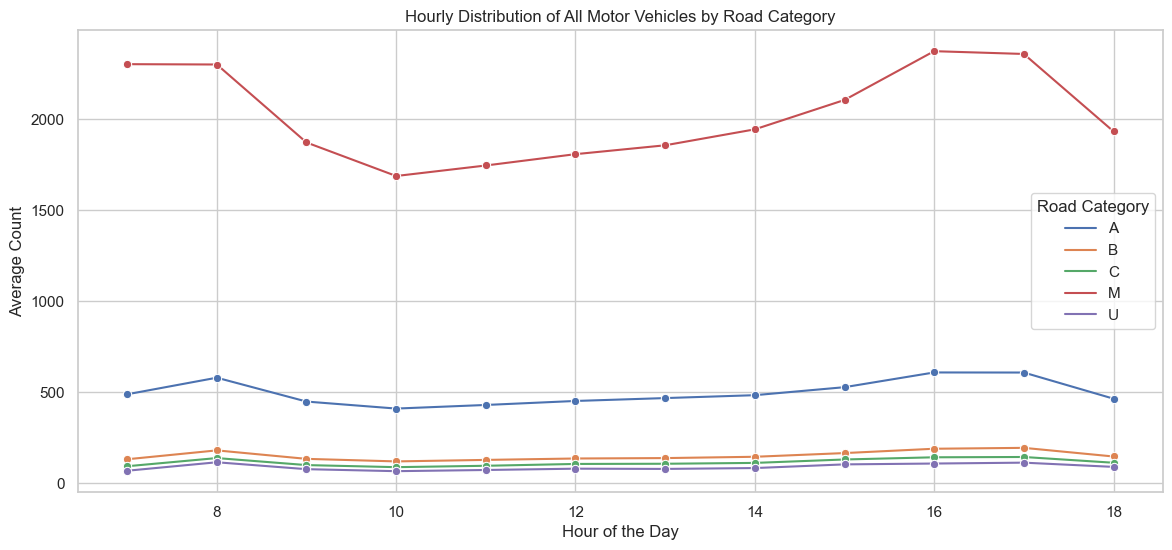

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 导入数据
url = "https://storage.googleapis.com/dft-statistics/road-traffic/downloads/rawcount/region_id/dft_rawcount_region_id_3.csv"
data = pd.read_csv(url)

# Step 2: 从 road_name 提取道路类别，并创建新列 road_category
data['road_category'] = data['road_name'].str[0]

# Step 3: 筛选出 M, A, B, C, U 五种道路类型的数据
data = data[data['road_category'].isin(['M', 'A', 'B', 'C', 'U'])]

# Step 4: 创建“机动车总数”列（不包括自行车）
data['all_motor_vehicles'] = data['cars_and_taxis'] + data['buses_and_coaches'] + data['lgvs'] + data['all_hgvs']

# Step 5: 按年和道路类型聚合数据，计算每种车辆类型的平均值
annual_road_vehicle_distribution = data.groupby(['year', 'road_category']).agg({
    'pedal_cycles': 'mean',
    'cars_and_taxis': 'mean',
    'buses_and_coaches': 'mean',
    'lgvs': 'mean',
    'all_hgvs': 'mean',
    'all_motor_vehicles': 'mean'
}).reset_index()

# Step 6: 按小时和道路类型聚合数据，计算每种车辆类型的平均值
hourly_distribution = data.groupby(['hour', 'road_category']).agg({
    'pedal_cycles': 'mean',
    'cars_and_taxis': 'mean',
    'buses_and_coaches': 'mean',
    'lgvs': 'mean',
    'all_hgvs': 'mean',
    'all_motor_vehicles': 'mean'
}).reset_index()

# Step 7: 设置可视化风格
sns.set(style="whitegrid")

# 年度变化图表：不同道路类型的车辆类型分布趋势
vehicle_types = ['pedal_cycles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs', 'all_motor_vehicles']
for vehicle in vehicle_types:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=annual_road_vehicle_distribution, x='year', y=vehicle, hue='road_category', marker="o")
    plt.title(f"Annual Distribution of {vehicle.replace('_', ' ').title()} by Road Category")
    plt.xlabel("Year")
    plt.ylabel("Average Daily Count")
    plt.legend(title="Road Category")
    plt.show()

# 日内分布图表：不同时间段的车辆分布
for vehicle in vehicle_types:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=hourly_distribution, x='hour', y=vehicle, hue='road_category', marker="o")
    plt.title(f"Hourly Distribution of {vehicle.replace('_', ' ').title()} by Road Category")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Count")
    plt.legend(title="Road Category")
    plt.show()



下面是实现 不同道路类型上的车辆分布对比 的代码，充分利用之前定义的数据和处理结果。

实现步骤
使用 annual_road_vehicle_distribution 数据：
这个数据已经聚合了不同 road_category 和车辆类型的年度平均流量。
计算每种车辆类型在各道路类型上的占比：
按道路类型计算所有车辆类型的总和，再计算各车辆类型占比。
可视化车辆类型的分布：
使用堆积柱状图展示每种道路类型的车辆分布占比。

<Figure size 1200x800 with 0 Axes>

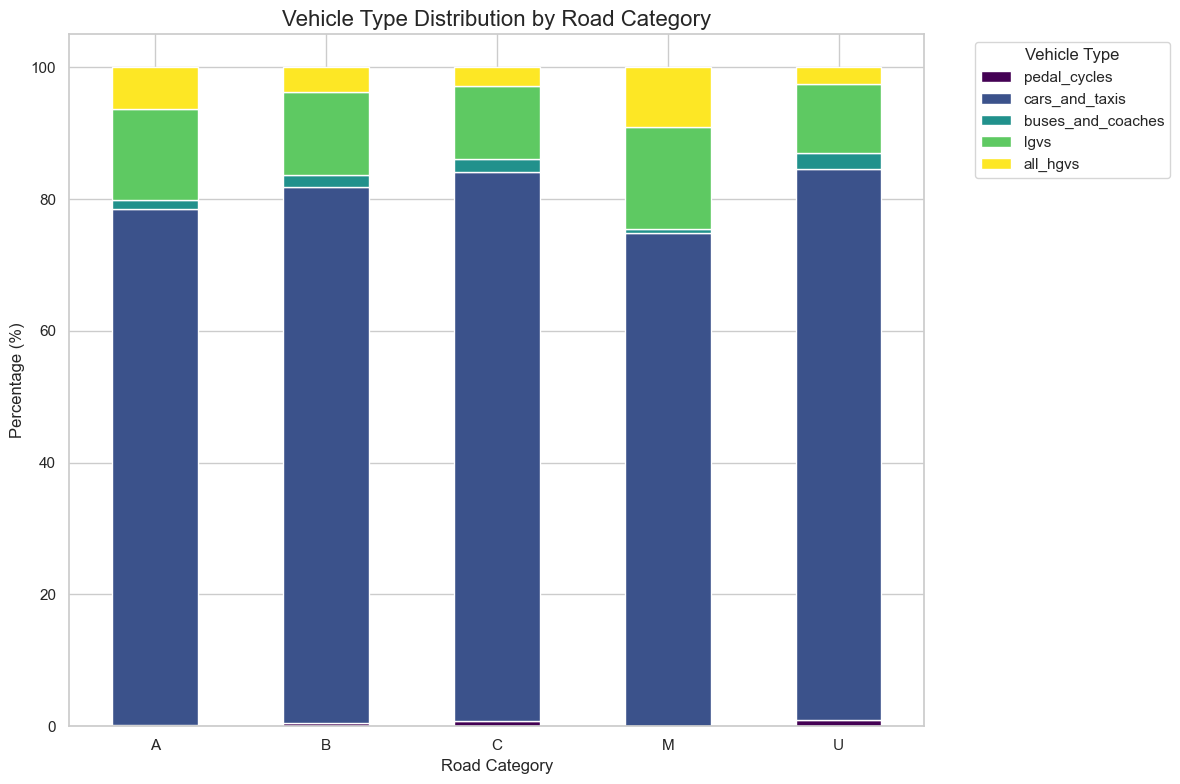

In [4]:
import matplotlib.pyplot as plt

# Step 1: 按道路类型计算总流量
road_type_totals = annual_road_vehicle_distribution.groupby('road_category')[
    ['pedal_cycles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']
].sum()

# Step 2: 计算每种车辆类型占比
road_type_percentages = road_type_totals.div(road_type_totals.sum(axis=1), axis=0) * 100

# Step 3: 绘制堆积柱状图
plt.figure(figsize=(12, 8))
road_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title("Vehicle Type Distribution by Road Category", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Road Category", fontsize=12)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()






实现步骤
使用 annual_road_vehicle_distribution：
这个数据包含了各 road_category 每年的车辆流量。
计算年增长率：
按 road_category 分组，计算 all_motor_vehicles 的年增长率。
绘制年增长趋势图：
使用折线图展示不同道路类型的年增长率变化趋势。

/var/folders/sb/cb4176cn5mx75n98wbrpd2mh0000gn/T/ipykernel_1929/416818994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth_data['growth_rate'] = growth_data.groupby('road_category')['all_motor_vehicles'].pct_change() * 100


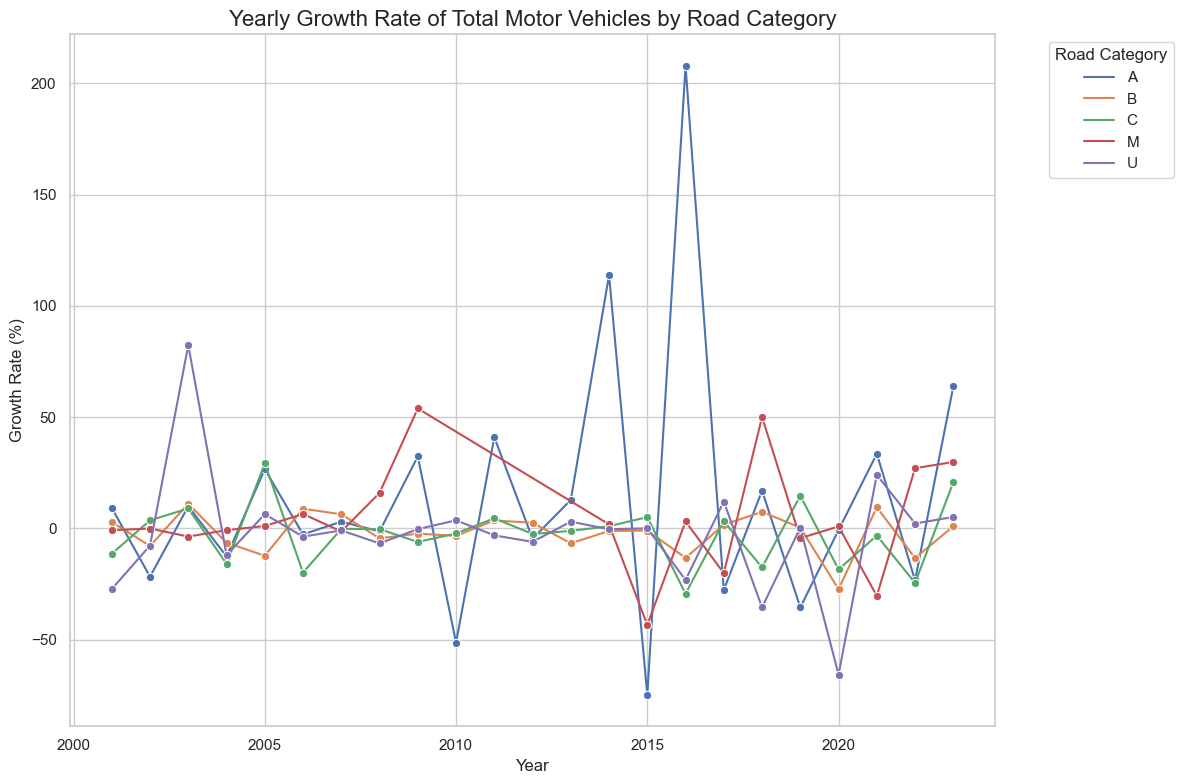

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 按道路类型和年份筛选总车辆流量
growth_data = annual_road_vehicle_distribution[['year', 'road_category', 'all_motor_vehicles']]

# Step 2: 计算年增长率（百分比变化）
growth_data['growth_rate'] = growth_data.groupby('road_category')['all_motor_vehicles'].pct_change() * 100

# Step 3: 绘制年增长趋势图
plt.figure(figsize=(12, 8))
sns.lineplot(data=growth_data, x='year', y='growth_rate', hue='road_category', marker="o")
plt.title("Yearly Growth Rate of Total Motor Vehicles by Road Category", fontsize=16)
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.legend(title="Road Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
